In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [9]:
dataset=pd.read_csv('C:/Users/hashm/OneDrive/Desktop/Volumetric_features.csv')

In [10]:
dataset.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1


In [11]:
#matrix of features
X = dataset.iloc[:,1:138].values
#vectors of age  
Y = dataset.iloc[:,139].values

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [13]:
scaler=StandardScaler()


In [14]:
X_train = scaler.fit_transform(X_train) #use fit transform on training set
X_test = scaler.transform(X_test) #use transform on test set so the same mean and variance 
                                  #used on the training data as is used to transform 

In [15]:
X_train.mean(axis=0)

array([-1.50702922e-15,  4.30309963e-16,  1.40810440e-14,  9.61933524e-15,
        4.91318032e-15, -8.68486742e-16,  2.49306164e-14, -1.13093952e-14,
        4.46060020e-16,  1.02124095e-15,  2.01997853e-14,  7.75640236e-15,
        5.69876165e-15, -2.99903100e-15,  7.62512998e-15,  8.32512888e-15,
        1.46349074e-16,  4.08250028e-15,  1.92107999e-15, -1.39354340e-15,
        1.08936528e-15, -2.08635706e-14, -1.37530109e-14,  1.47622217e-14,
        1.25928196e-15,  1.23504100e-17, -2.96183422e-14,  1.50445074e-15,
       -3.13460632e-15, -3.75350638e-15,  1.47843605e-15, -3.74230561e-15,
       -1.15725969e-15, -5.15646040e-16,  0.00000000e+00,  0.00000000e+00,
        2.58385522e-16,  0.00000000e+00,  0.00000000e+00, -9.81627665e-16,
       -2.16746410e-15, -7.70967774e-15,  2.14062824e-15, -5.95084468e-15,
        4.33795012e-15,  5.02958950e-16,  7.60194833e-16,  7.67275789e-15,
       -9.44321873e-15, -5.02213327e-15, -2.57083966e-16,  1.61015185e-16,
       -4.86790095e-17, -

Explained Variance: 0.8500901316920173
Mean Square Error: 63.03510218221327
R-Squared 0.8498913858581263


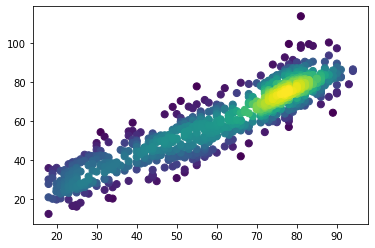

In [16]:
##MLR
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, Y_train)

regr.predict(X_train)
Y_predict_test=regr.predict(X_test)

#Performance metrics
VAR = metrics.explained_variance_score(Y_test, Y_predict_test)
MSE = metrics.mean_squared_error(Y_test, Y_predict_test)
R2=metrics.r2_score(Y_test, Y_predict_test)

print('Explained Variance:', VAR)
print('Mean Square Error:', MSE)
print('R-Squared', R2)

#Density scatter plot of true brain age versus predicted brain age from test set data
from scipy.stats import gaussian_kde

x = Y_test
y = Y_predict_test

# Calculate point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sorting points based on density
sort = z.argsort()
x, y, z = x[sort], y[sort], z[sort]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50)

In [ ]:
##CART

Explained Variance: 0.7009806612218794
Mean Square Error: 125.66903073286052
R-Squared 0.7007381063755123


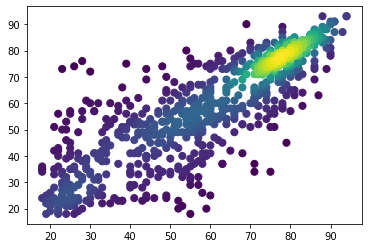

In [18]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor()
regr.fit(X_train, Y_train)

regr.predict(X_train)
Y_predict_test=regr.predict(X_test)

#Performance metrics
VAR = metrics.explained_variance_score(Y_test, Y_predict_test)
MSE = metrics.mean_squared_error(Y_test, Y_predict_test)
R2=metrics.r2_score(Y_test, Y_predict_test)

print('Explained Variance:', VAR)
print('Mean Square Error:', MSE)
print('R-Squared', R2)

#Density scatter plot of true brain age versus predicted brain age from test set data
from scipy.stats import gaussian_kde

x = Y_test
y = Y_predict_test

# Calculate point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sorting points based on density
sort = z.argsort()
x, y, z = x[sort], y[sort], z[sort]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50)

In [ ]:
##SVM

Explained Variance: 0.8339875827273642
Mean Square Error: 69.72693990477218
R-Squared 0.8339557809043665


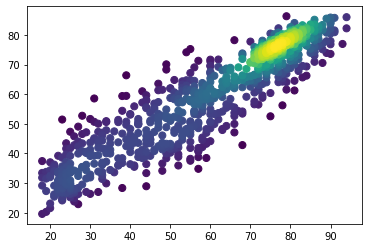

In [19]:
from sklearn.svm import SVR
regr = SVR()
regr.fit(X_train, Y_train)

regr.predict(X_train)
Y_predict_test=regr.predict(X_test)

#Performance metrics
VAR = metrics.explained_variance_score(Y_test, Y_predict_test)
MSE = metrics.mean_squared_error(Y_test, Y_predict_test)
R2=metrics.r2_score(Y_test, Y_predict_test)

print('Explained Variance:', VAR)
print('Mean Square Error:', MSE)
print('R-Squared', R2)

#Density scatter plot of true brain age versus predicted brain age from test set data
from scipy.stats import gaussian_kde

x = Y_test
y = Y_predict_test

# Calculate point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sorting points based on density
sort = z.argsort()
x, y, z = x[sort], y[sort], z[sort]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50)